[]

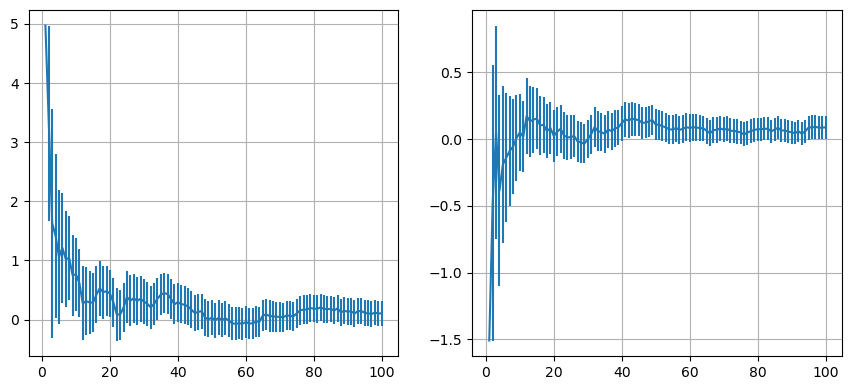

In [35]:
import numpy as np
import matplotlib.pyplot as plt

csv_path = "./CSV/"

direct_data = np.loadtxt(csv_path + "Ex3_1_dir.csv", delimiter=',')
direct_data[:,0] = direct_data[:,0] - 14.975790778311286
direct_data[:,2] = direct_data[:,2] - 5.4595325819072364

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10.5, 4.5)

for i in range(0, 4, 2):

    axs[int(i / 2)].errorbar(np.arange(1,101,1), direct_data[:,i], yerr=direct_data[:,i+1])
    axs[int(i / 2)].grid(True)

plt.plot()

[]

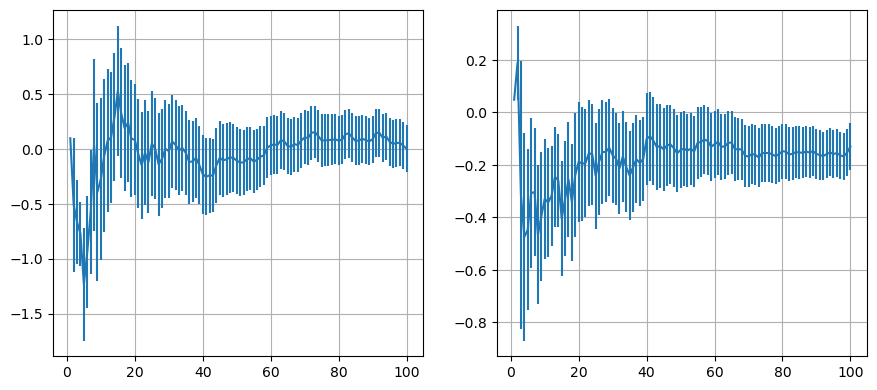

In [36]:
step_data = np.loadtxt(csv_path + "Ex3_1_step.csv", delimiter=',')
step_data[:,0] = step_data[:,0] - 14.975790778311286
step_data[:,2] = step_data[:,2] - 5.4595325819072364

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10.5, 4.5)

for i in range(0, 4, 2):

    axs[int(i / 2)].errorbar(np.arange(1,101,1), step_data[:,i], yerr=step_data[:,i+1])
    axs[int(i / 2)].grid(True)

plt.plot()